Imports

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.utils import class_weight
import os


import load_data as ld
import network_model as nt
import utilities as tools

Load data

In [2]:
# declare consts of main paths
DATABASE = os.path.abspath('../../Database/')
DATABASES_VERSIONS = os.listdir(DATABASE)
# choose the path to right database version
DATABASE_VERSION = 'V4'
use_database = os.path.join(DATABASE, list(filter(lambda x: DATABASE_VERSION in x, DATABASES_VERSIONS))[0])
datasets = ld.get_classes_names(use_database)

If datasets are already divided in to train and validation => run below, if not the next one or no one bc may be not written yet

In [3]:
# path_train = os.path.join(use_database, datasets[0])
# path_valid = os.path.join(use_database, datasets[1])

path_train, path_valid, path_test = tools.get_paths(use_database, datasets)

classes = ld.get_classes_names(path_train)

# classes numbers
classes_numbers = tools.make_labels_dict(classes)

# train set
imgs_train, labels_train = ld.save_to_arr(classes, path_train, classes_numbers)
# validation set
imgs_valid, labels_valid = ld.save_to_arr(classes, path_valid, classes_numbers)
# test set
imgs_test, labels_test = ld.save_to_arr(classes, path_test, classes_numbers)
# these functions shuffles data to

classes_weights = dict(enumerate(class_weight.compute_class_weight('balanced', classes = np.unique(labels_train), y=labels_train)))

In [ ]:
# img_shape = imgs_train.shape
# img_shape = (img_shape[1], img_shape[2], 1)

Learn model

In [ ]:
# model training
# Load the training data

# # Fit the model
img_shape = imgs_train.shape
model = nt.build_neural_model(nuber_of_classes = len(classes), img_shape = (img_shape[1], img_shape[2], 1))
trained_model, history_model = nt.train_model(
    model, 
    imgs_train=imgs_train, labels_train=labels_train,
    imgs_val=imgs_valid, labels_val=labels_valid,
    epochs_number=50
)

In [ ]:
# trained_model = nt.compile_model(trained_model)
trained_model_2, history_model_2 = nt.train_model(
    trained_model, 
    imgs_train=imgs_train, labels_train=labels_train, 
    imgs_val=imgs_valid, labels_val=labels_valid, 
    epochs_number=15
)

Serialize model to json

In [ ]:
save2_file_name = "test_NONE_SURPRISE_optimizer_nadam_batch_256"

ld.serialize_model(trained_model, file_name = save2_file_name, history_model=history_model)

In [4]:
save2_file_name = "test_NONE_SURPRISE_optimizer_nadam_batch_256"
model, history_model = ld.desrialize_model(save2_file_name)


Loaded model from disk


Show trained model and evaluate

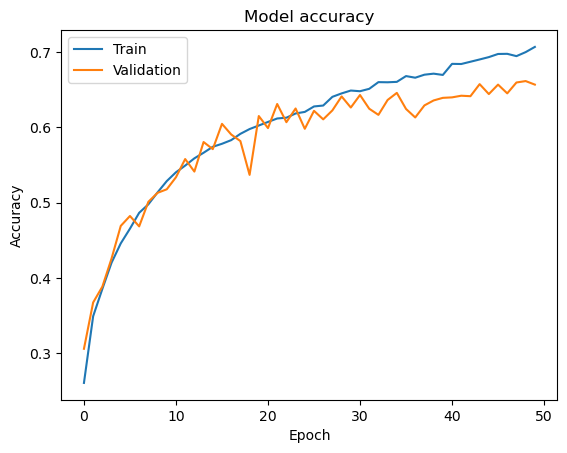

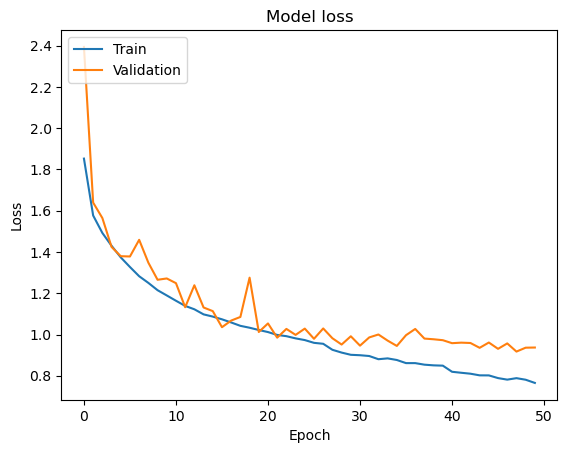

100/100 [==============================] - 6s 61ms/step - loss: 0.9511 - accuracy: 0.6456


array([[271,   4,  39,  18,  94,  69],
       [ 16,  31,   1,   1,   4,   3],
       [ 54,   4, 249,  23,  93,  90],
       [ 21,   2,  11, 790,  61,  14],
       [ 26,   1,  39,  51, 444,  59],
       [ 65,   7,  78,  25, 158, 275]], dtype=int64)

In [6]:
# save2_file_name_path = "../../Model/"+save2_file_name

plt.plot(history_model['accuracy'])
plt.plot(history_model['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig(save2_file_name_path+"_accuracy.png")
plt.show()


plt.plot(history_model['loss'])
plt.plot(history_model['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig(save2_file_name_path+"_loss.png")
plt.show()


# Make predictions
predictions = model.predict(imgs_test)
eval = model.evaluate(imgs_test, labels_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(labels_test, predictions.argmax(axis=1))

Deserialize model from json

In [7]:
print((history_model['accuracy'])[-1])
print((history_model['val_accuracy'])[-1])
print((history_model['loss'])[-1])
print((history_model['val_loss'])[-1])

0.7071734070777893
0.6570261120796204
0.7653898000717163
0.9369351863861084
